# Day 2 - LoDoPaB Dataset Exploration

In this notebook, we will:

1. Load the **LoDoPaB** dataset using `dival`.
2. Inspect the dataset statistics (train/validation/test sizes).
3. Sample and visualize data (ground truth vs. sinogram).
4. Apply HU clipping and normalization as preprocessing.

## 1. Import packages & load dataset

We use `LoDoPaBDataset` from `dival.datasets`.
Since ASTRA CUDA backend is not avaiable in this environment, we explicitly set the implementation to **`skimage`** (CPU).

In [20]:
from dival.datasets import LoDoPaBDataset
import matplotlib.pyplot as plt
import numpy as np
import random


ds = LoDoPaBDataset(impl='skimage')

## 2. Dataset statistics

Check the number of samples available in each split (train/validation/test).
This ensures the dataset has been loaded correctly from the configured path.

In [21]:
print("Train:", ds.get_len("train"))
print("Validation:", ds.get_len("validation"))
print("Test:", ds.get_len("test"))

Train: 35820
Validation: 3522
Test: 3553


## 3. Inspect a sample

We retrive a sample from the training set and explicitly convert it to `numpy.ndarray`.
This allows us to examine array shapes and intensity ranges for both ground truth (CT slice) and sinogram (projection data).

In [22]:
observation, ground_truth = ds.get_sample(0, part='train')


to_np = lambda x: x.asarray() if hasattr(x, "asarray") else np.asarray(x)
sino_np = to_np(observation)
gt_np = to_np(ground_truth)

print(type(gt_np), gt_np.shape, gt_np.min(), gt_np.max())
print(type(sino_np), sino_np.shape, sino_np.min(), sino_np.max())

<class 'numpy.ndarray'> (362, 362) 0.0 0.489164
<class 'numpy.ndarray'> (1000, 513) -0.000798698 0.0802129


## 4. Visualization

Display the **Ground Truth CT slice** and the corresponding **Low-dose Sinogram** side by side.
This step provides an intuitive understanding of how the data looks befor preprocessing or reconstruction.

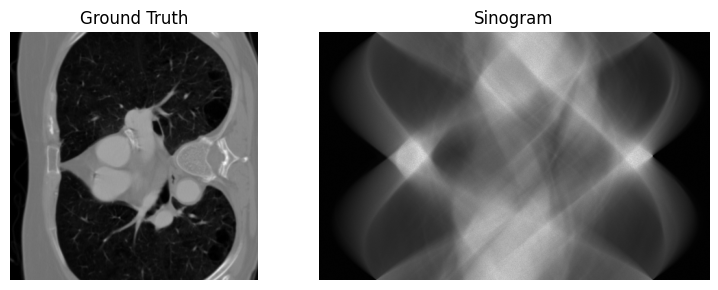

In [23]:
plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
plt.imshow(gt_np, cmap='gray')
plt.title('Ground Truth')
_ = plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sino_np, cmap='gray', aspect='auto')
plt.title('Sinogram')
_ = plt.axis('off')

plt.tight_layout()
plt.show()

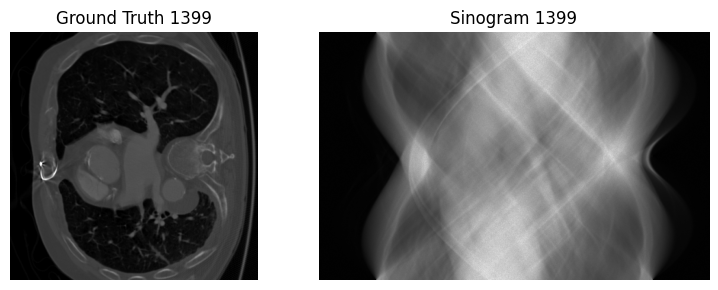

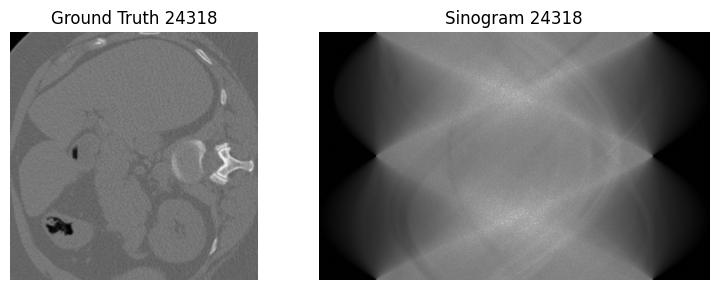

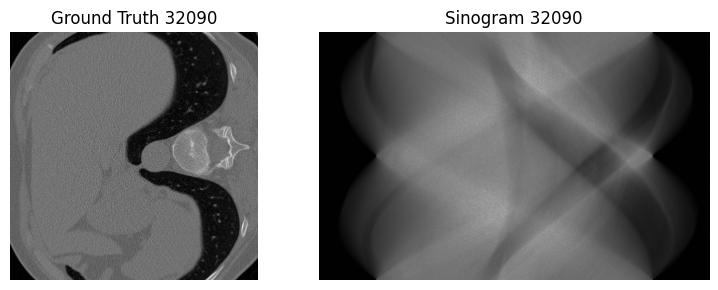

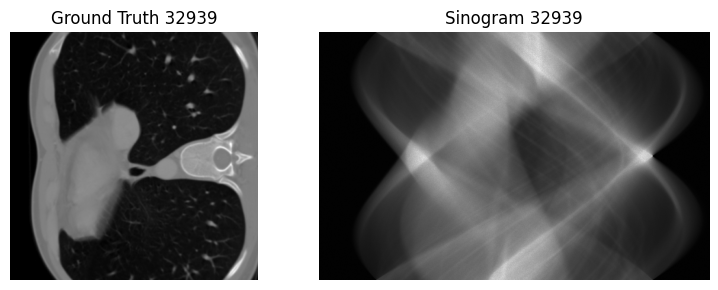

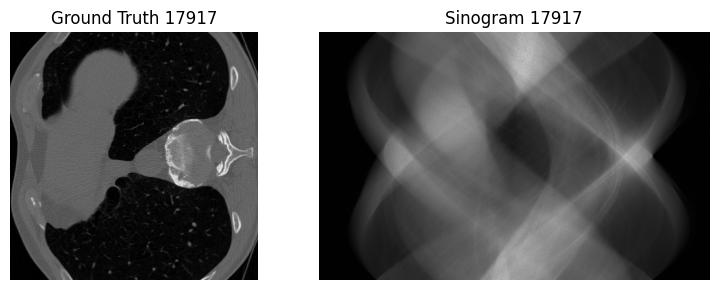

In [24]:
for i in range(5):
    idx = random.randint(0, ds.get_len("train")-1)
    obs, gt = ds.get_sample(idx, part='train')
    obs_np = obs.asarray() if hasattr(obs, 'asarray') else np.asarray(obs)
    gt_np = gt.asarray() if hasattr(gt, 'asaarray') else np.asarray(gt)

    plt.figure(figsize=(8, 3))

    #Plot ground truth
    plt.subplot(1, 2, 1)
    plt.imshow(gt_np, cmap='gray')
    plt.title(f'Ground Truth {idx}')
    _ = plt.axis('off')

    #Plot Sinogram
    plt.subplot(1, 2, 2)
    plt.imshow(obs_np, cmap='gray', aspect='auto')
    plt.title(f'Sinogram {idx}')
    _ = plt.axis('off')

    plt.tight_layout()
    plt.show()